In [5]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔄 Load the Excel dataset
df = pd.read_csv("/content/Sales_data.csv")  # change to .csv if needed



Dataset

In [6]:
df.head()

,S.N,SKU,NAME,Type,Sales Quantity,Price,1st March,2nd March,3rd March,4th March,...,21st March,22nd March,23rd March,24th March,25th March,26th March,27th March,28th March,29th March,30th March
0,1,B01,Parley G,Biscuit,per piece,₹5.00,5,5,3,4,...,8,9,0,4,2,3,5,3,5,4
1,2,B02,Happy Happy,Biscuit,Per piece,₹5.00,4,3,3,8,...,7,6,4,3,1,2,4,6,5,8
2,3,B03,Good Day,Biscuit,Per piece,₹10.00,1,2,1,0,...,1,3,2,2,4,0,2,1,2,1
3,4,B04,Marie Gold,Biscuit,per piece,₹40.00,0,1,0,0,...,1,3,1,0,2,0,0,1,0,0
4,5,B05,Cream,Biscuit,Per piece,₹5.00,6,2,4,6,...,7,4,4,5,3,1,0,2,4,8


Clean & Prepare the Data

In [7]:
# Clean column names
df.columns = df.columns.str.strip()

# Convert ₹ Price column to numeric
df['Price'] = df['Price'].astype(str).str.replace("₹", "").astype(float)

# Extract daily sales columns (all columns after "Price")
date_cols = df.columns[df.columns.get_loc("Price") + 1:]

# Fill blank/missing values with 0
df[date_cols] = df[date_cols].fillna(0)


EDA

In [18]:
# Add descriptive stats
df['Mean'] = df[date_cols].mean(axis=1)
df['Max'] = df[date_cols].max(axis=1)
df['Std'] = df[date_cols].std(axis=1)
df['Variance'] = df[date_cols].var(axis=1)

df[["SKU", "NAME", "Mean", "Max", "Std", "Variance"]].head()


,SKU,NAME,Mean,Max,Std,Variance
0,B01,Parley G,5.266667,10,2.558735,6.547126
1,B02,Happy Happy,5.333333,9,2.106367,4.436782
2,B03,Good Day,1.300000,4,1.118805,1.251724
3,B04,Marie Gold,0.600000,3,0.813676,0.662069
4,B05,Cream,4.833333,8,2.035603,4.143678


 EDA — Basic Statistics

In [19]:
# Total quantity sold per SKU
df["Total_Quantity_Sold"] = df[date_cols].sum(axis=1)

# Revenue per SKU
df["Revenue"] = df["Total_Quantity_Sold"] * df["Price"]

# Descriptive stats
eda_df = df[date_cols].agg(['mean', 'std', 'max', 'min']).T
display(eda_df)


,mean,std,max,min
1st March,3.979592,3.198240,16.0,0.0
2nd March,4.163265,3.561056,16.0,0.0
3rd March,4.285714,3.547299,18.0,0.0
4th March,4.571429,3.611325,20.0,0.0
5th March,3.204082,3.115683,18.0,0.0
6th March,2.857143,2.581989,12.0,0.0
7th March,3.448980,6.800923,44.0,0.0
8th March,2.510204,2.599058,8.0,0.0
9th March,2.510204,2.459018,8.0,0.0
10th March,2.428571,2.661453,10.0,0.0


Revenue Pareto

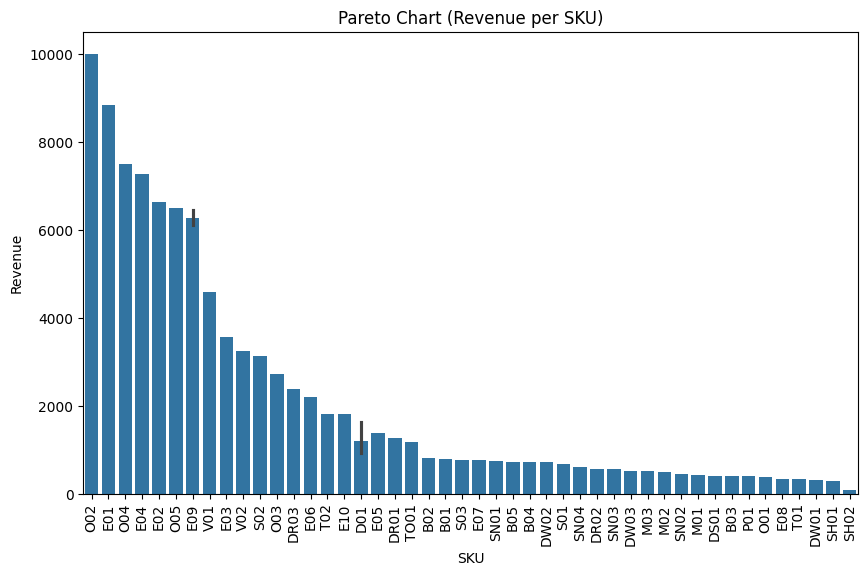

In [9]:
# Sort by revenue
pareto_df = df.sort_values(by="Revenue", ascending=False).reset_index(drop=True)

# Cumulative revenue %
pareto_df['Cumulative_Revenue'] = pareto_df['Revenue'].cumsum()
pareto_df['Cumulative_Revenue_%'] = 100 * pareto_df['Cumulative_Revenue'] / pareto_df['Revenue'].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="SKU", y="Revenue", data=pareto_df)
plt.xticks(rotation=90)
plt.title("Pareto Chart (Revenue per SKU)")
plt.ylabel("Revenue")
plt.show()


Volume Pareto

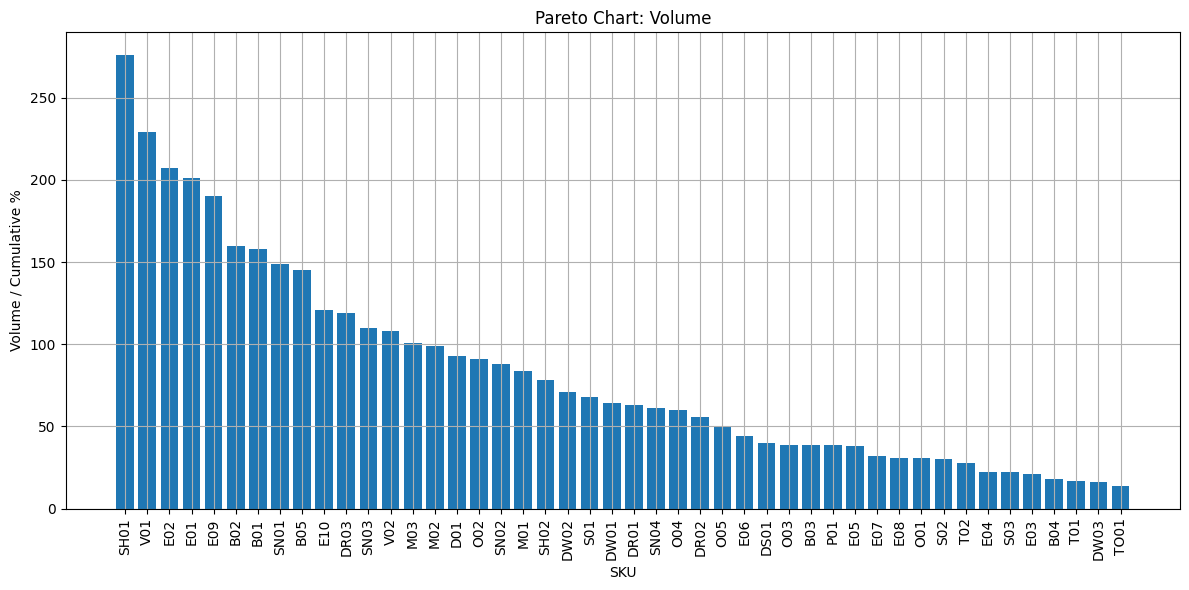

In [23]:
df_volume = df.sort_values(by='Total_Quantity_Sold', ascending=False)
df_volume['Cum_Volume'] = df_volume['Total_Quantity_Sold'].cumsum()
df_volume['Volume_Pct'] = df_volume['Cum_Volume'] / df_volume['Total_Quantity_Sold'].sum()

plt.figure(figsize=(12, 6))
plt.bar(df_volume['SKU'], df_volume['Total_Quantity_Sold'])

plt.title("Pareto Chart: Volume")
plt.xlabel("SKU")
plt.ylabel("Volume / Cumulative %")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-24-1470326732>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, ax=ax[0], palette="Blues_r")
<ipython-input-24-1470326732>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_volume.values, y=category_volume.index, ax=ax[1], palette="Greens_r")


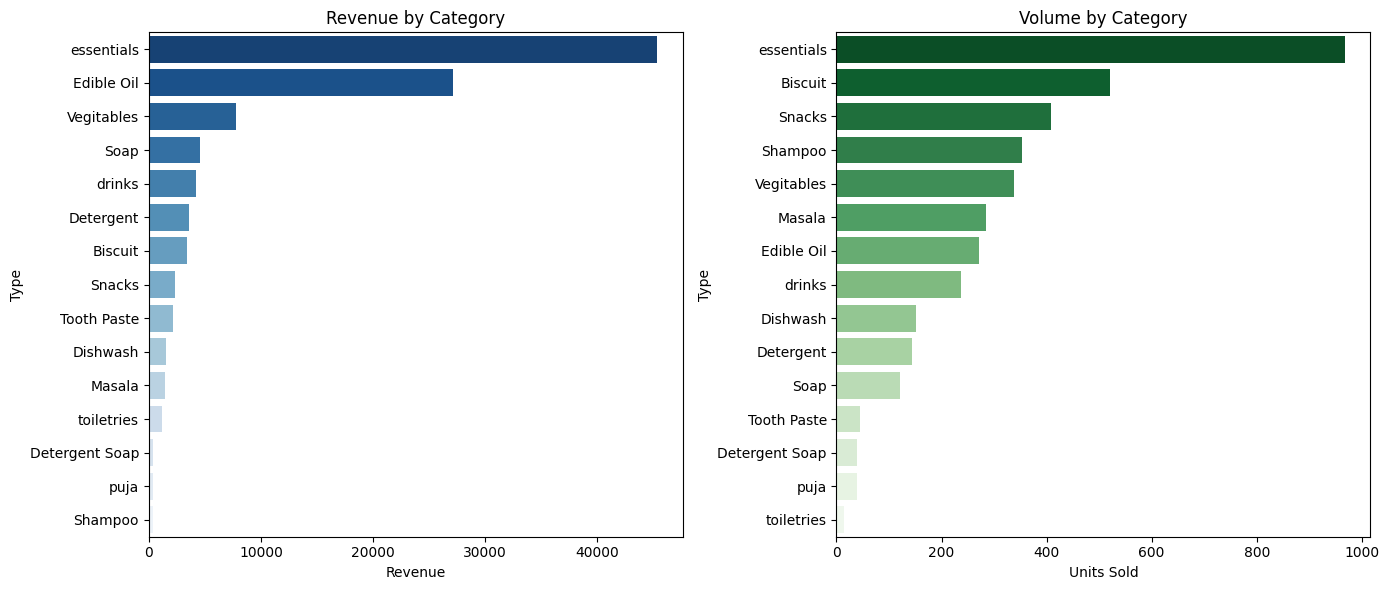

In [24]:
# Grouping
category_revenue = df.groupby("Type")["Revenue"].sum().sort_values(ascending=False)
category_volume = df.groupby("Type")["Total_Quantity_Sold"].sum().sort_values(ascending=False)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=category_revenue.values, y=category_revenue.index, ax=ax[0], palette="Blues_r")
ax[0].set_title("Revenue by Category")
ax[0].set_xlabel("Revenue")

sns.barplot(x=category_volume.values, y=category_volume.index, ax=ax[1], palette="Greens_r")
ax[1].set_title("Volume by Category")
ax[1].set_xlabel("Units Sold")

plt.tight_layout()
plt.show()


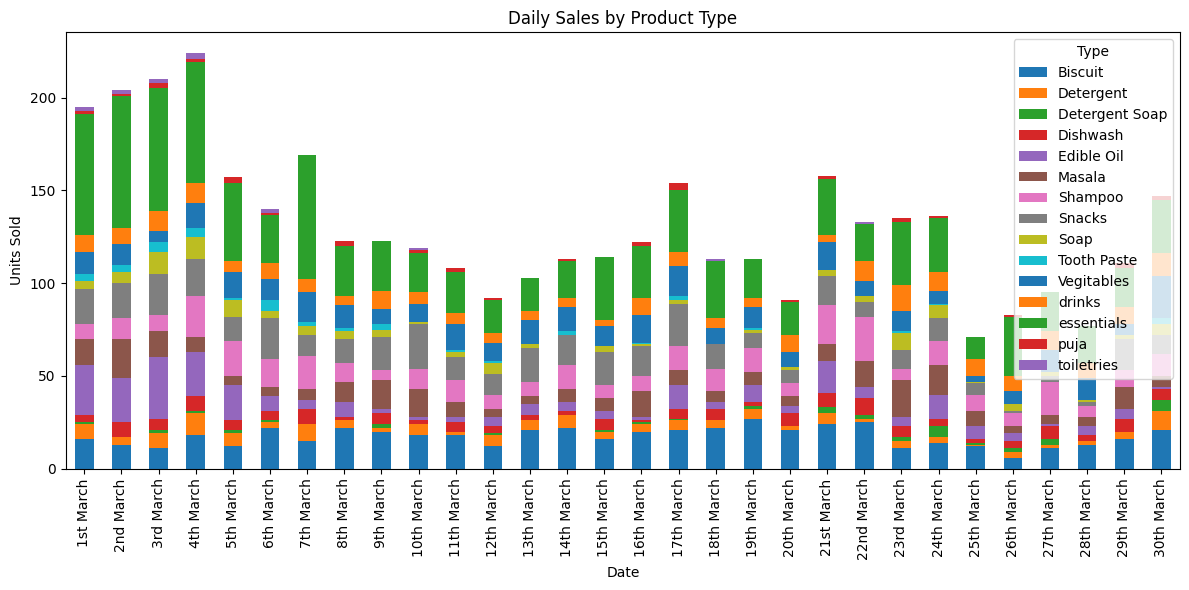

In [10]:
# Total sales by Type
type_summary = df.groupby("Type")[date_cols].sum().T

# Plot
type_summary.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Daily Sales by Product Type")
plt.ylabel("Units Sold")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [27]:
df

,S.N,SKU,NAME,Type,Sales Quantity,Price,1st March,2nd March,3rd March,4th March,...,Total_Quantity_Sold,Revenue,Avg_Demand,Std_Dev,Safety_Stock,Reorder_Point,Mean,Max,Std,Variance
0,1,B01,Parley G,Biscuit,per piece,5.0,5,5,3,4,...,158,790.0,5.266667,2.558735,4.15,9.42,5.266667,10,2.558735,6.547126
1,2,B02,Happy Happy,Biscuit,Per piece,5.0,4,3,3,8,...,160,800.0,5.333333,2.106367,3.42,8.75,5.333333,9,2.106367,4.436782
2,3,B03,Good Day,Biscuit,Per piece,10.0,1,2,1,0,...,39,390.0,1.300000,1.118805,1.82,3.12,1.300000,4,1.118805,1.251724
3,4,B04,Marie Gold,Biscuit,per piece,40.0,0,1,0,0,...,18,720.0,0.600000,0.813676,1.32,1.92,0.600000,3,0.813676,0.662069
4,5,B05,Cream,Biscuit,Per piece,5.0,6,2,4,6,...,145,725.0,4.833333,2.035603,3.30,8.14,4.833333,8,2.035603,4.143678
5,6,D01,Guide,Detergent,500gm,40.0,2,1,2,1,...,26,1040.0,0.866667,0.819307,1.33,2.20,0.866667,2,0.819307,0.671264
6,7,D01,Guide,Detergent,1kg,65.0,4,1,3,5,...,25,1625.0,0.833333,1.341212,2.18,3.01,0.833333,5,1.341212,1.798851
7,8,D01,Surf Excel,Detergent,pouch,10.0,2,2,3,6,...,93,930.0,3.100000,1.561388,2.53,5.63,3.100000,6,1.561388,2.437931
8,9,T01,Closeup,Tooth Paste,per piece,20.0,1,0,0,2,...,17,340.0,0.566667,0.858360,1.39,1.96,0.566667,3,0.858360,0.736782
9,10,T02,Colgate,Tooth Paste,200gm,65.0,3,4,5,3,...,28,1820.0,0.933333,1.436791,2.33,3.26,0.933333,5,1.436791,2.064368


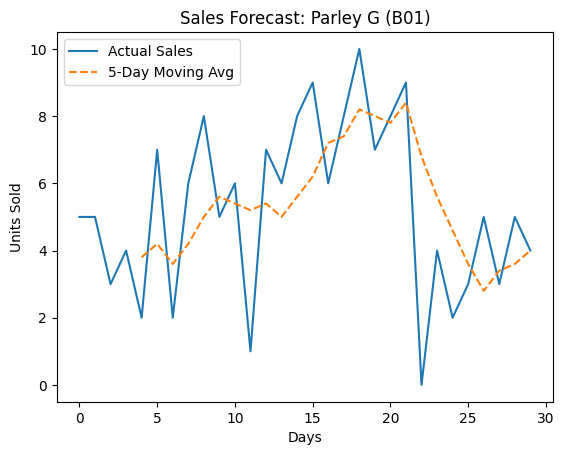

In [11]:
# Moving average for a sample SKU
sample_sku = df.iloc[0]  # First row

sales_series = sample_sku[date_cols].values
moving_avg = pd.Series(sales_series).rolling(window=5).mean()

# Plot
plt.plot(sales_series, label="Actual Sales")
plt.plot(moving_avg, label="5-Day Moving Avg", linestyle='--')
plt.title(f"Sales Forecast: {sample_sku['NAME']} ({sample_sku['SKU']})")
plt.xlabel("Days")
plt.ylabel("Units Sold")
plt.legend()
plt.show()


In [12]:
# Assuming lead time = 1 day
lead_time = 1

# Assuming service level Z-score: 99% (Z=2.33), 95% (Z=1.65)
def get_z_score(service_level):
    return 2.33 if service_level == 0.99 else 1.65

# Compute safety stock & reorder point
safety_stock_list = []
reorder_point_list = []

for _, row in df.iterrows():
    demand = row[date_cols].values
    avg_demand = np.mean(demand)
    std_dev = np.std(demand)

    z = get_z_score(0.99 if row["Type"] in ["Essentials", "Edible Oil"] else 0.95)
    safety_stock = z * std_dev * np.sqrt(lead_time)
    reorder_point = avg_demand * lead_time + safety_stock

    safety_stock_list.append(round(safety_stock, 2))
    reorder_point_list.append(round(reorder_point, 2))

df["Avg_Demand"] = df[date_cols].mean(axis=1)
df["Std_Dev"] = df[date_cols].std(axis=1)
df["Safety_Stock"] = safety_stock_list
df["Reorder_Point"] = reorder_point_list


In [16]:
df[["SKU", "NAME", "Avg_Demand", "Std_Dev", "Safety_Stock", "Reorder_Point"]]


,SKU,NAME,Avg_Demand,Std_Dev,Safety_Stock,Reorder_Point
0,B01,Parley G,5.266667,2.558735,4.15,9.42
1,B02,Happy Happy,5.333333,2.106367,3.42,8.75
2,B03,Good Day,1.300000,1.118805,1.82,3.12
3,B04,Marie Gold,0.600000,0.813676,1.32,1.92
4,B05,Cream,4.833333,2.035603,3.30,8.14
5,D01,Guide,0.866667,0.819307,1.33,2.20
6,D01,Guide,0.833333,1.341212,2.18,3.01
7,D01,Surf Excel,3.100000,1.561388,2.53,5.63
8,T01,Closeup,0.566667,0.858360,1.39,1.96
9,T02,Colgate,0.933333,1.436791,2.33,3.26
